# Regração linear é um metodo estatistico de machine learning que eu posso usar para quantificar e fazer predições com base em relacionamentos numericos entre variaveis 

----

## tipos de regressão linear
* ## Regreção simples = um preditor e um predito
* ## Regração multipla = multiplos preditores e um predito

----
## Pressupostos da regrassão linear 
* ## todas as variaveias sao continua, numericas, e nao categoricas 
* ## sem outliers ou NaN
* ## Tem que existir um relção linear entre os preditores e o predito 
* ## as variaveis preditoras sao independentes 

In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns  
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [4]:
curso = pd.read_csv('dados/enrollment_forecast.csv')
curso.columns = ['year-ano', 'roll-inscritos', 'unem-desenprego', 'hgrad-fromados', 'inc-renda']
curso.head(2)

,year-ano,roll-inscritos,unem-desenprego,hgrad-fromados,inc-renda
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961


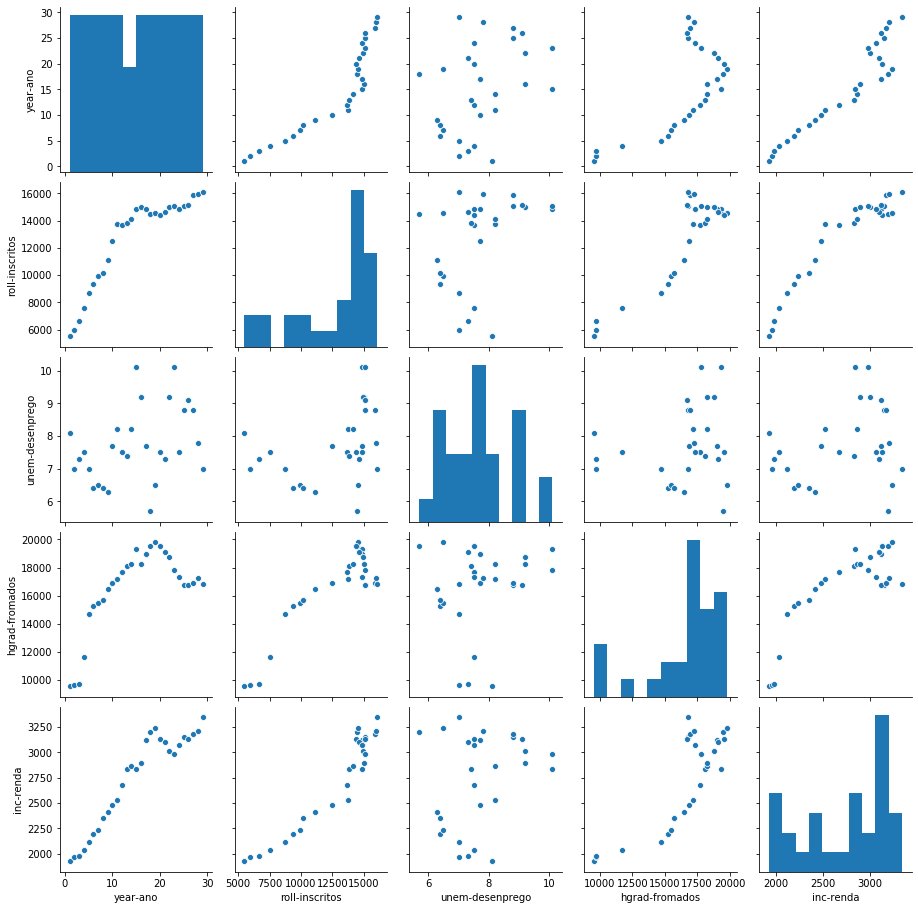

In [5]:
sns.pairplot(curso)

In [6]:
curso.corr()

,year-ano,roll-inscritos,unem-desenprego,hgrad-fromados,inc-renda
year-ano,1.000000,0.900934,0.378305,0.670300,0.944287
roll-inscritos,0.900934,1.000000,0.391344,0.890294,0.949876
unem-desenprego,0.378305,0.391344,1.000000,0.177376,0.282310
hgrad-fromados,0.670300,0.890294,0.177376,1.000000,0.820089
inc-renda,0.944287,0.949876,0.282310,0.820089,1.000000


In [7]:
inscritos = curso['inc-renda'].values
target = curso['roll-inscritos'].values

x, y = scale(inscritos), target

In [8]:
Nan = x == np.NAN
Nan.sum()
x = x.reshape(-1,1)

In [9]:
regressao = LinearRegression(normalize=True)
regressao.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [10]:
regressao.score(x,y)

0.902263871166997

In [11]:
coeficiente_angular = regressao.coef_[0]
coeficiente_linear = regressao.intercept_


In [12]:
coeficiente_angular

3037.208621124741

In [13]:
coeficiente_linear

12707.034482758621

In [14]:
reta = coeficiente_angular* x + coeficiente_linear


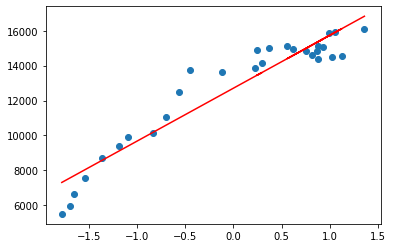

In [15]:
plt.scatter(x,y)
plt.plot(x, reta, label='ajuste linerar', color='red')

In [176]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

mae = mean_absolute_error(y, reta)
rmse = np.sqrt(mean_squared_error(y, reta))

In [177]:
mae

796.1882904098045

In [178]:
rmse

999.6210821195507